#1.Darknet

In [1]:
!ls

drive  sample_data


In [2]:
%cd /content/drive/MyDrive

/content/drive/MyDrive


In [3]:
!ls

 bad.list	    Fastcampus_OpenCV	  predictions.jpg   Wanted
'Colab Notebooks'   Fastcampus_머신러닝   SQL		   '서울시 읍면동'
 darknet	    kaggle.json		  UnKnown.ipynb     이력서.pdf


In [ ]:
# clone darknet repo
!git clone https://github.com/AlexeyAB/darknet

Cloning into 'darknet'...
remote: Enumerating objects: 15833, done.
remote: Total 15833 (delta 0), reused 0 (delta 0), pack-reused 15833
Receiving objects: 100% (15833/15833), 14.35 MiB | 10.96 MiB/s, done.
Resolving deltas: 100% (10670/10670), done.
Updating files: 100% (2056/2056), done.


In [4]:
# change makefile to have GPU and OPENCV enabled
%cd darknet
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile

/content/drive/MyDrive/darknet


In [5]:
# verify CUDA
!/usr/local/cuda/bin/nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2023 NVIDIA Corporation
Built on Tue_Aug_15_22:02:13_PDT_2023
Cuda compilation tools, release 12.2, V12.2.140
Build cuda_12.2.r12.2/compiler.33191640_0


In [6]:
!nvidia-smi

Sat Jan 13 22:49:01 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   43C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [7]:
# make darknet (build)
!make

chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -rdynamic -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:945:23: warning: variable ‘rgb’ set but not used []8;;https://gcc.gnu.org/onlinedocs/gcc/Warning-Options.html#index-Wunused-but-set-variable-Wunused-but-set-variable]8;;]
  945 |                 float rgb[3];
      |                       ^~~
./src/image_opencv.cpp: In function ‘void cv_draw_object(image, float*, int, int, int*, float*, int*, int, char**)’:
./src/image_opencv.cpp:1443:14: warning: unused variable ‘buff’ []8;;https://gcc.gnu.org/onlinedocs/gcc/Warn

In [ ]:
# get yolov3 pretrained coco dataset weights
!wget https://pjreddie.com/media/files/yolov3.weights

--2024-01-13 05:52:28--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 162.0.215.52
Connecting to pjreddie.com (pjreddie.com)|162.0.215.52|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘yolov3.weights’

yolov3.weights      100%[===================>] 236.52M  33.5MB/s    in 10s     

2024-01-13 05:52:39 (22.8 MB/s) - ‘yolov3.weights’ saved [248007048/248007048]



In [8]:
# define helper functions
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()

# use this to upload files
def upload():
  from google.colab import files
  uploaded = files.upload()
  for name, data in uploaded.items():
    with open(name, 'wb') as f:
      f.write(data)
      print ('saved file', name)

# use this to download a file
def download(path):
  from google.colab import files
  files.download(path)

In [9]:
# run darknet detection
!./darknet detect cfg/yolov3.cfg yolov3.weights data/person.jpg

 CUDA-version: 12020 (12020), cuDNN: 8.9.6, GPU count: 1  
 OpenCV version: 4.5.4
 0 : compute_capability = 750, cudnn_half = 0, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5,  

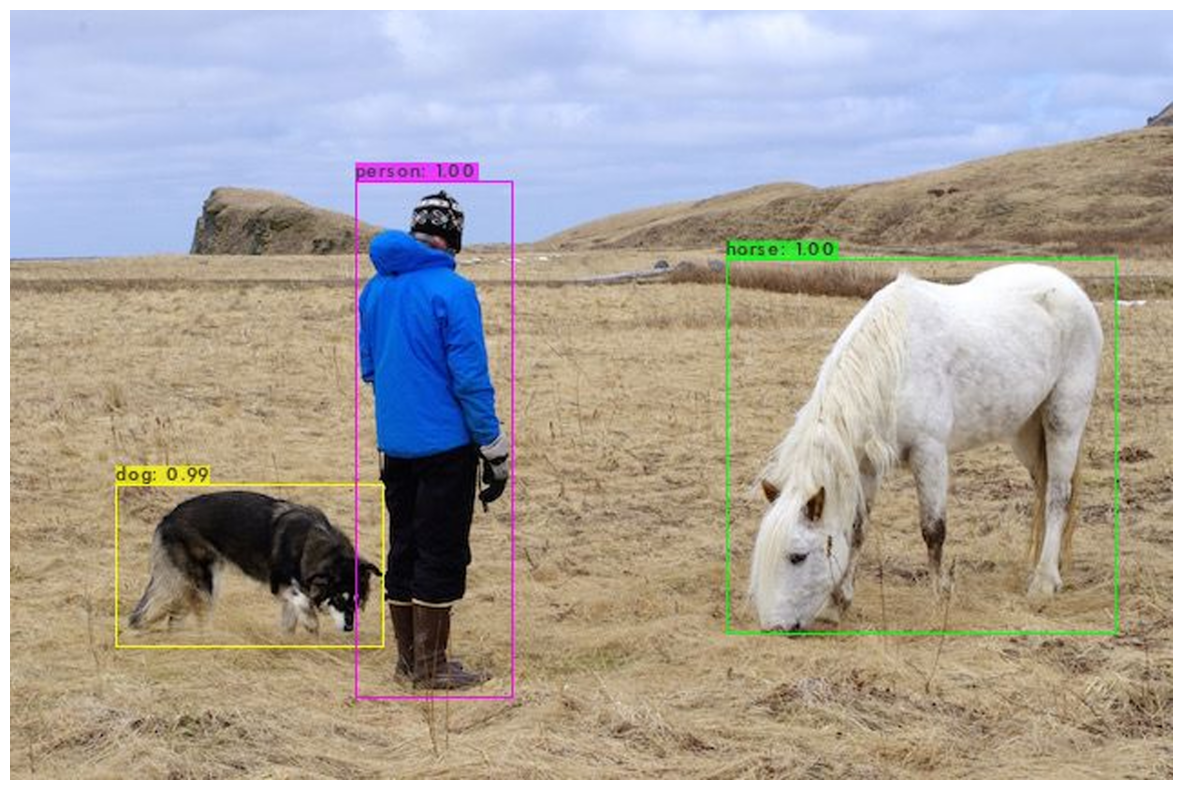

In [10]:
# show image using our helper function
imShow('predictions.jpg')

In [ ]:
# look we can run another detection!
!./darknet detect cfg/yolov3.cfg yolov3.weights data/dog.jpg

 CUDA-version: 11080 (12020), cuDNN: 8.9.6, GPU count: 1  
 OpenCV version: 4.5.4
 0 : compute_capability = 750, cudnn_half = 0, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5,  

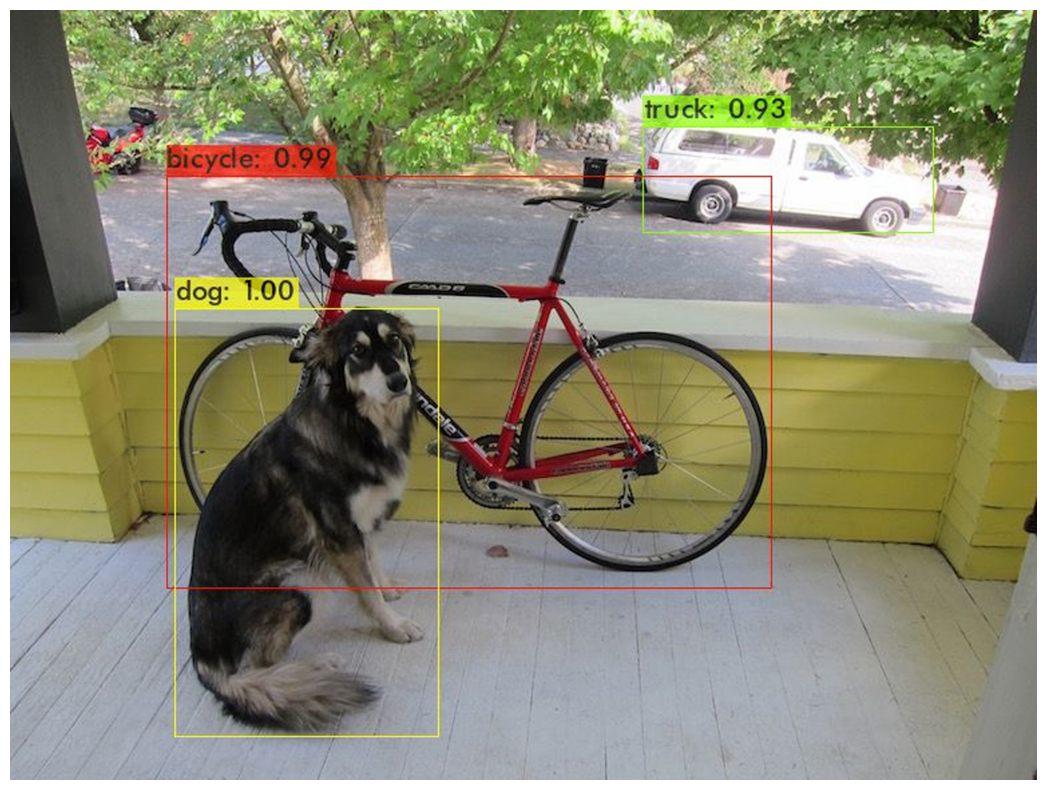

In [ ]:
imShow('predictions.jpg')

#2.Custom YOLO

In [ ]:
# Download Pretrained Convolutional Weights
!wget https://pjreddie.com/media/files/darknet53.conv.74

--2024-01-13 05:53:07--  https://pjreddie.com/media/files/darknet53.conv.74
Resolving pjreddie.com (pjreddie.com)... 162.0.215.52
Connecting to pjreddie.com (pjreddie.com)|162.0.215.52|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 162482580 (155M) [application/octet-stream]
Saving to: ‘darknet53.conv.74’

darknet53.conv.74   100%[===================>] 154.96M  33.9MB/s    in 7.4s    

2024-01-13 05:53:14 (20.9 MB/s) - ‘darknet53.conv.74’ saved [162482580/162482580]



In [ ]:
# Train The Model
!./darknet detector train custom/custom_data.data custom/custom-train-yolo.cfg darknet53.conv.74 -dont_show

In [ ]:
!ls

3rdparty		     darknet		     image_yolov4.sh	    results
backup			     darknet53.conv.74	     include		    scripts
bad.list		     DarknetConfig.cmake.in  json_mjpeg_streams.sh  src
build			     darknet_images.py	     LICENSE		    vcpkg.json
build.ps1		     darknet.py		     Makefile		    vcpkg.json.opencv23
cfg			     darknet_video.py	     net_cam_v3.sh	    video_yolov3.sh
chart_custom-train-yolo.png  data		     net_cam_v4.sh	    video_yolov4.sh
chart.png		     docker-compose.yml      obj		    yolov3.weights
cmake			     Dockerfile.cpu	     package.xml
CMakeLists.txt		     Dockerfile.gpu	     predictions.jpg
custom			     image_yolov3.sh	     README.md


In [4]:
!ls /content/drive/MyDrive/darknet/custom

classes.names	       fruit01.jpg  fruit03.jpg  fruit05.jpg  fruit07.jpg  fruit09.jpg	test.txt
classes.txt	       fruit01.txt  fruit03.txt  fruit05.txt  fruit07.txt  fruit09.txt	train.txt
custom_data.data       fruit02.jpg  fruit04.jpg  fruit06.jpg  fruit08.jpg  fruit10.jpg
custom-train-yolo.cfg  fruit02.txt  fruit04.txt  fruit06.txt  fruit08.txt  fruit10.txt


#3.Train Yolo

### last_weight

In [21]:
!ls

3rdparty		     darknet		     image_yolov4.sh	    results
backup			     darknet53.conv.74	     include		    scripts
bad.list		     DarknetConfig.cmake.in  json_mjpeg_streams.sh  src
build			     darknet_images.py	     LICENSE		    vcpkg.json
build.ps1		     darknet.py		     Makefile		    vcpkg.json.opencv23
cfg			     darknet_video.py	     net_cam_v3.sh	    video_yolov3.sh
chart_custom-train-yolo.png  data		     net_cam_v4.sh	    video_yolov4.sh
chart.png		     docker-compose.yml      obj		    yolov3.weights
cmake			     Dockerfile.cpu	     package.xml
CMakeLists.txt		     Dockerfile.gpu	     predictions.jpg
custom			     image_yolov3.sh	     README.md


In [11]:
# 실행 권한 부여
!chmod +x darknet

In [32]:
!ls

3rdparty		     darknet		     image_yolov4.sh	    results
backup			     darknet53.conv.74	     include		    scripts
bad.list		     DarknetConfig.cmake.in  json_mjpeg_streams.sh  src
build			     darknet_images.py	     LICENSE		    vcpkg.json
build.ps1		     darknet.py		     Makefile		    vcpkg.json.opencv23
cfg			     darknet_video.py	     net_cam_v3.sh	    video_yolov3.sh
chart_custom-train-yolo.png  data		     net_cam_v4.sh	    video_yolov4.sh
chart.png		     docker-compose.yml      obj		    yolov3.weights
cmake			     Dockerfile.cpu	     package.xml
CMakeLists.txt		     Dockerfile.gpu	     predictions.jpg
custom			     image_yolov3.sh	     README.md


In [ ]:
!/content/drive/MyDrive/darknet/darknet detector train /content/drive/MyDrive/darknet/custom/custom_data.data /content/drive/MyDrive/darknet/custom/custom-train-yolo.cfg /content/drive/MyDrive/darknet/backup/custom-train-yolo_last.weights -dont_show

### 1000_weight ->

In [ ]:
!/content/drive/MyDrive/darknet/darknet detector test /content/drive/MyDrive/darknet/custom/custom_data.data /content/drive/MyDrive/darknet/custom/custom-train-yolo.cfg /content/drive/MyDrive/darknet/backup/custom-train-yolo_1000.weights /content/drive/MyDrive/darknet/custom/fruit10.jpg

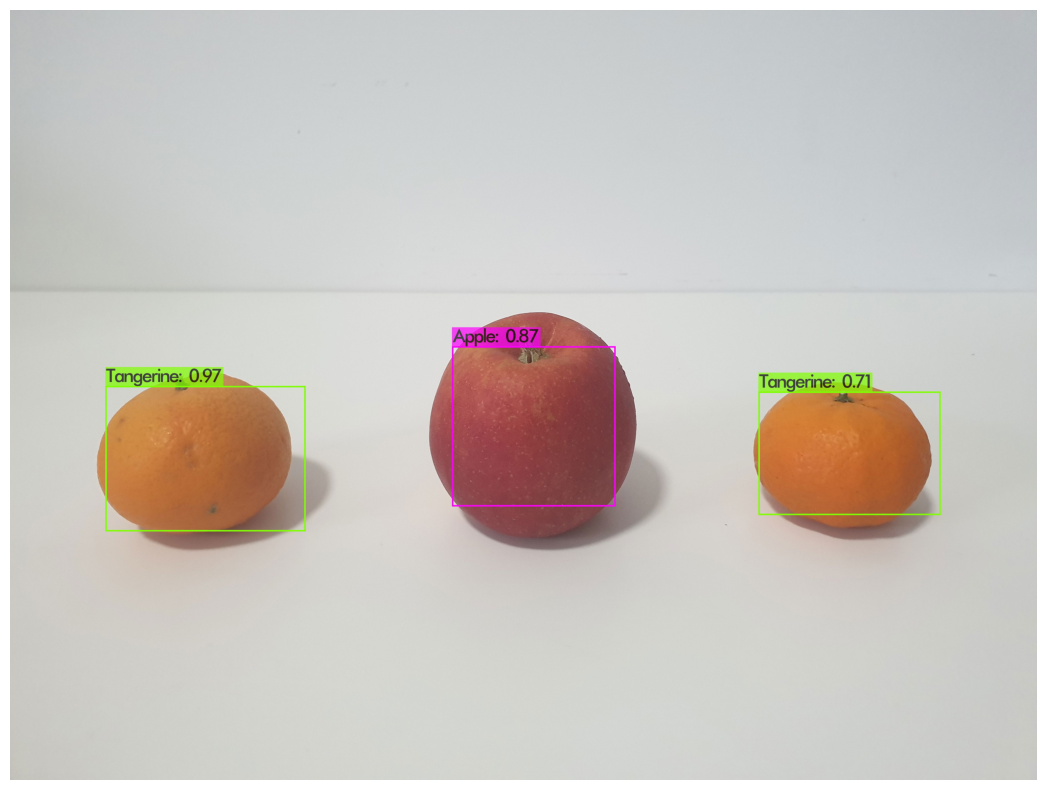

In [ ]:
imShow('predictions.jpg')

### 2000_weight

In [ ]:
!/content/drive/MyDrive/darknet/darknet detector test /content/drive/MyDrive/darknet/custom/custom_data.data /content/drive/MyDrive/darknet/custom/custom-train-yolo.cfg /content/drive/MyDrive/darknet/backup/custom-train-yolo_2000.weights /content/drive/MyDrive/darknet/custom/fruit10.jpg

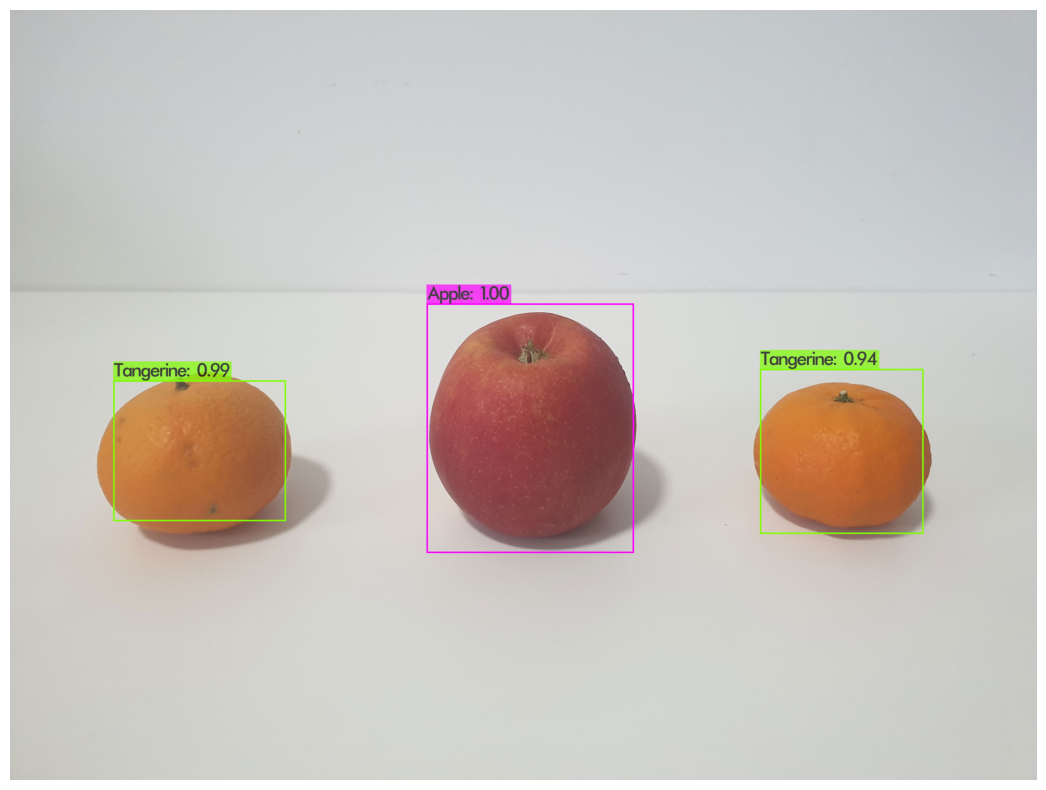

In [16]:
imShow('predictions.jpg')

### 3000_weight

In [ ]:
!/content/drive/MyDrive/darknet/darknet detector test /content/drive/MyDrive/darknet/custom/custom_data.data /content/drive/MyDrive/darknet/custom/custom-train-yolo.cfg /content/drive/MyDrive/darknet/backup/custom-train-yolo_3000.weights /content/drive/MyDrive/darknet/custom/fruit10.jpg

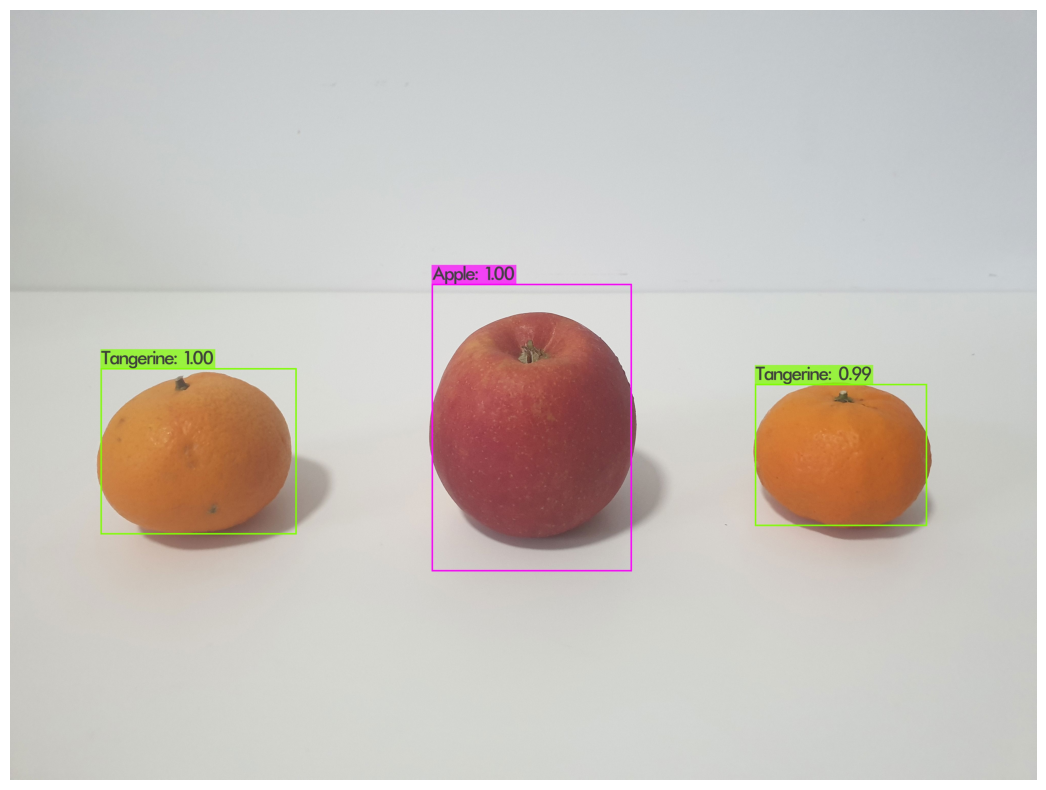

In [19]:
imShow('predictions.jpg')

### 4000_weight

In [ ]:
!/content/drive/MyDrive/darknet/darknet detector test /content/drive/MyDrive/darknet/custom/custom_data.data /content/drive/MyDrive/darknet/custom/custom-train-yolo.cfg /content/drive/MyDrive/darknet/backup/custom-train-yolo_4000.weights /content/drive/MyDrive/darknet/custom/fruit10.jpg

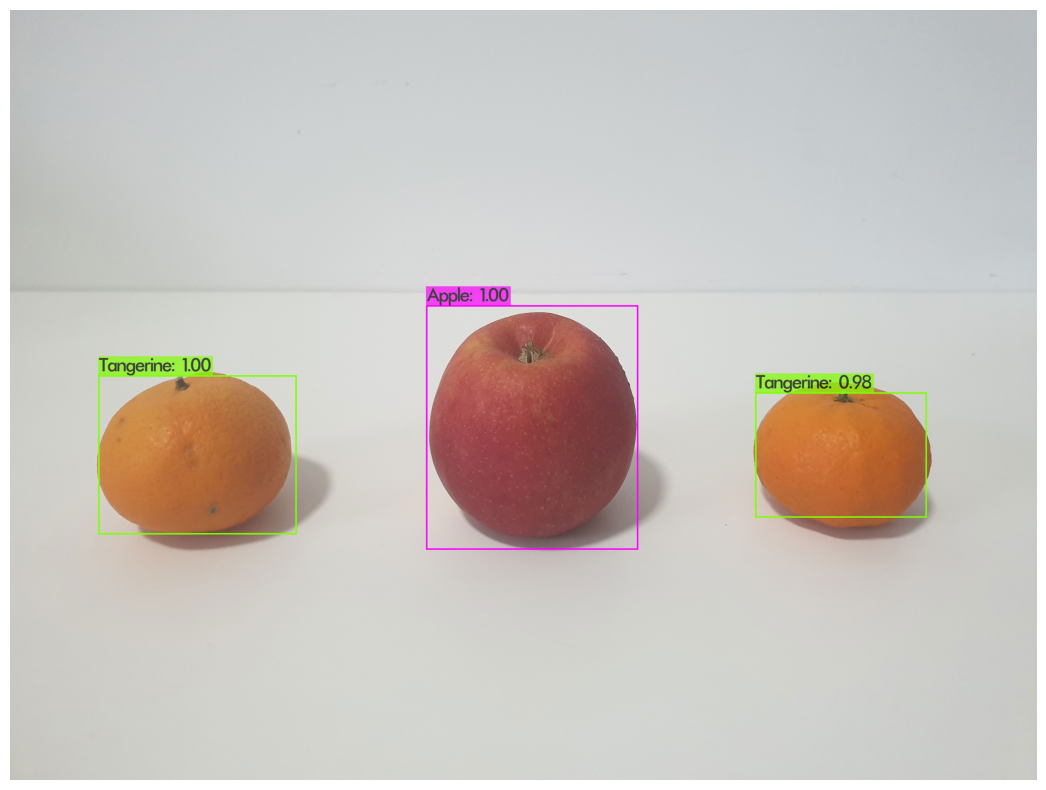

In [21]:
imShow('predictions.jpg')

## 결과

In [23]:
!ls -al  /content/drive/MyDrive/darknet/backup

total 1443324
-rw------- 1 root root 246326928 Jan 13 08:54 custom-train-yolo_1000.weights
-rw------- 1 root root 246326928 Jan 13 13:47 custom-train-yolo_2000.weights
-rw------- 1 root root 246326928 Jan 14 01:40 custom-train-yolo_3000.weights
-rw------- 1 root root 246326928 Jan 14 04:33 custom-train-yolo_4000.weights
-rw------- 1 root root 246326928 Jan 14 04:33 custom-train-yolo_final.weights
-rw------- 1 root root 246326928 Jan 14 04:33 custom-train-yolo_last.weights


 CUDA-version: 12020 (12020), cuDNN: 8.9.6, GPU count: 1  
 OpenCV version: 4.5.4
 0 : compute_capability = 750, cudnn_half = 0, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 16, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5, 

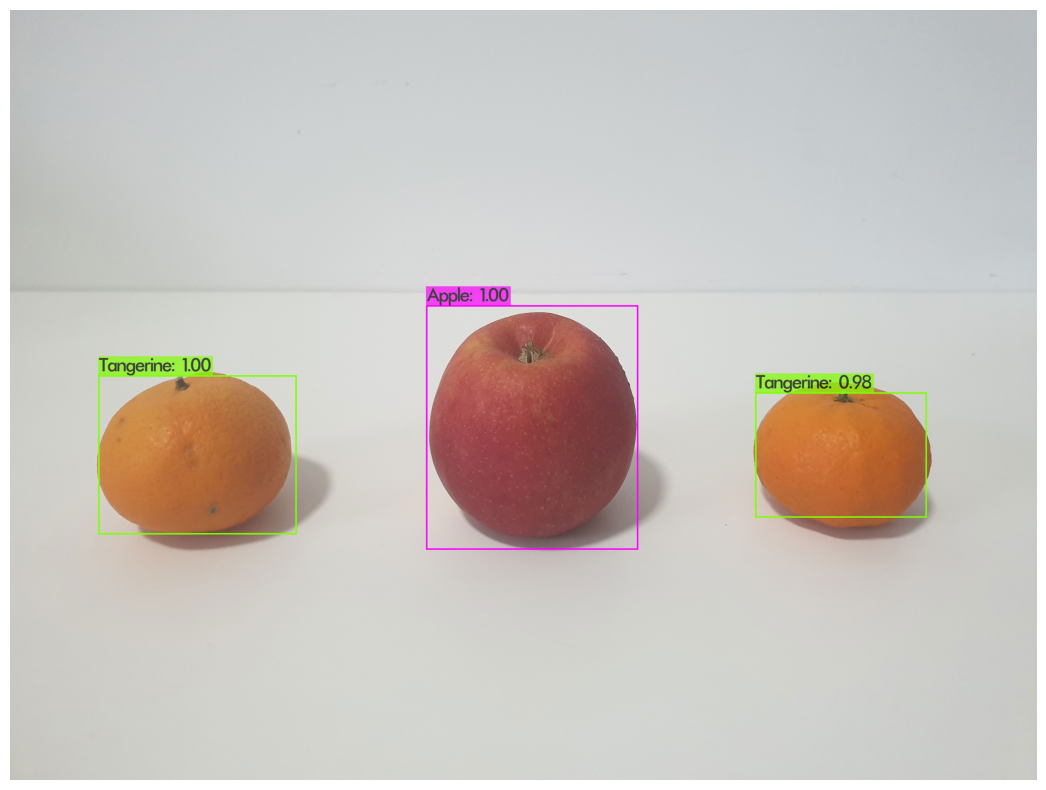

In [27]:
!/content/drive/MyDrive/darknet/darknet detector test /content/drive/MyDrive/darknet/custom/custom_data.data /content/drive/MyDrive/darknet/custom/custom-train-yolo.cfg /content/drive/MyDrive/darknet/backup/custom-train-yolo_final.weights /content/drive/MyDrive/darknet/custom/fruit10.jpg
print('final_weight')
imShow('predictions.jpg')